In [2]:
from haarpy import weingarten_class
from haarpy import weingarten_element
from functions import cycle_classes_St, z_n, wg_weighted_trace_diff
import numpy as np
import matplotlib.pyplot as plt
from sympy.combinatorics import Permutation

**Scaling of Weingarten Coefficients**

$Wg(\sqrt{d})_{\pi}$ only depends on the conjugacy class, so let's first look at the variation across conjugacy classes that have the same length (# of cycles)

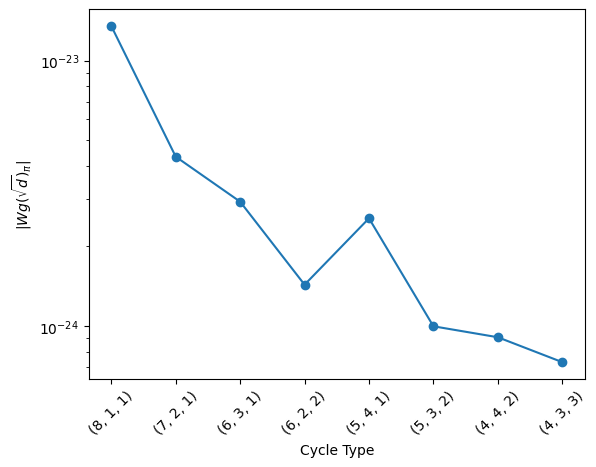

In [2]:
n = 10    # number of qubits
sqrtd = int(2**(n/2))
t = 10     # number of copies
c = 3     # number of cycles in π

conj_cl = cycle_classes_St(t, c)
wg = np.zeros(len(conj_cl))

for i in range(len(conj_cl)):
    wg[i] = weingarten_class(conj_cl[i], sqrtd)        # Weingarten coefficient for the conjugacy class
    
plt.plot(range(len(conj_cl)), np.abs(wg), 'o-')
plt.xticks(range(len(conj_cl)), [str(cl) for cl in conj_cl], rotation=45)
plt.yscale('log')
plt.xlabel('Cycle Type')
plt.ylabel(r'$|Wg(\sqrt{d})_{\pi}|$')
plt.show()

**Scaling of Weingarten Coefficients**

$Wg(\sqrt{d})_{\pi\sigma}Wg(\sqrt{d})_{\pi^{-1}\tau\sigma'}$

In [3]:
pi = Permutation.random(t)
pi_inv = ~pi
sigma = Permutation.random(t)
tau = Permutation.random(t)
a = sum(pi.cycle_structure.values())

print(a)

2


**Checking a few random terms**

For a fixed t, uniformly draw 10 samples of $\sigma, \sigma', \pi, \tau$ from $S_t$, and evaluate the trace weighted by Weingarten coefficient (Eq. 47 in overleaf).

In [3]:
# t~ poly(n)
# check max-log entangled
# 2**n \gg t

n = 10
l = 9
Nt = 5   # number of t evaluated
tstart = 12
tstep = 1
d = 2**n
traces = np.zeros(Nt)
samples = 10


for j in range(Nt):
    sample_sum = 0
    t = j + tstart + tstep
    zn = z_n(n,t)
    zl = z_n(l,t)
    for i in range(samples):
        sample_sum += wg_weighted_trace_diff(n,l,t,zn,zl)
    traces[j] = sample_sum/samples

print(traces)


[ 1.18253480e+05 -4.45226178e+08  4.39487758e+15  5.68665457e+20
  3.67642375e+30]


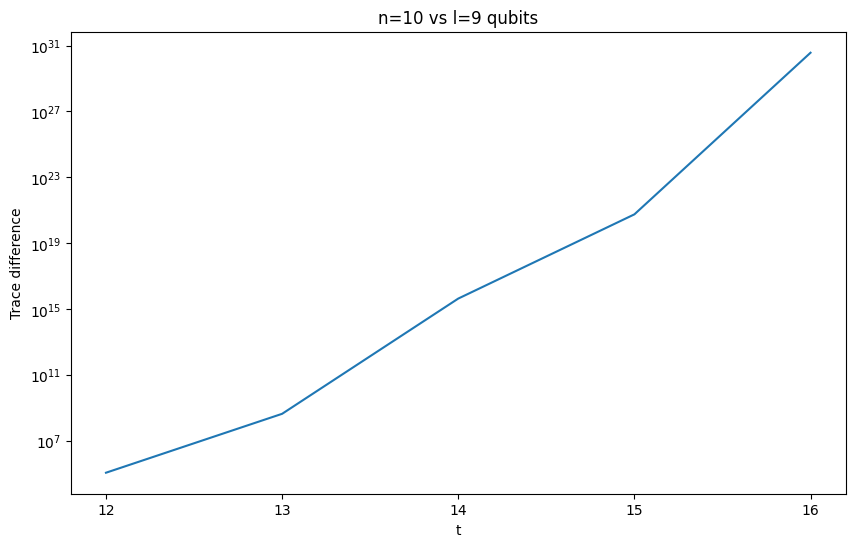

In [4]:
plt.figure(figsize=(10, 6))
xvals = list(range(tstart, tstart + tstep*Nt, tstep))
plt.plot(xvals, abs(traces))
plt.title(f'n={n} vs l={l} qubits')
plt.xlabel('t')
plt.yscale('log')
plt.xticks(xvals)
plt.ylabel('Trace difference')
plt.show()